In [3]:
#imports
import tensorflow as tf
from tensorflow.keras import layers, models
from keras.preprocessing.image import ImageDataGenerator
from keras import backend as K
import matplotlib.pyplot as plt

### Image/Data preprocessing

In [39]:
#figuring out whether to use a table to store labels or filename
#last 3 or idx[:-3] of filename can be the label
#e.g. 8937_day or 8937_1 

#1 - assign class by changing name to '<n>_1' or '<n>_0' where n is idx 1 = Day | 0 = Night
#2 - randomly shuffle several times across both day and night
#3 - divide into train and test x and y (image and label)
#4 - create label array using just the last value of the filename

#imports
import os
import os.path
from PIL import Image

#1
#filepaths for day/night
#f_day = r'C:/Users/vicch/jupyterlab_workspace/image_process_output/day_all/'
#f_night = r'C:/Users/vicch/jupyterlab_workspace/image_process_output/night_all/'

#renaming all day/night adding 1 or 0 on the end
#for file in os.listdir(f_day):
#    f_oldname = f_day+'/'+file
#    f_newname = f_oldname[:-4]+'_1.jpg'
#    #renaming files
#    os.rename(f_oldname, f_newname)

#for file in os.listdir(f_night):
#    f_oldname = f_night+'/'+file
#    f_newname = f_oldname[:-4]+'_0.jpg'
#    #renaming files
#    os.rename(f_oldname, f_newname)

In [ ]:
#2
#randomly shuffle test with a set seed to check as long as list len is same so is shuffle order
import random 
#x = [1, 2, 3, 4, 5, 6]
#y = ['a', 'b', 'c', 'd', 'e', 'f']

#seed = 5
#random.Random(seed).shuffle(x)
#random.Random(seed).shuffle(y)
#print(x)
#print(y)

###Output:
###[2, 1, 4, 6, 3, 5]
###['b', 'a', 'd', 'f', 'c', 'e']

#manually copy the day and night images to same directory: combined_day_night
#randomly assign a 5 digit number to start of each file name

#filepath for combined
f_combined = r'C:/Users/vicch/jupyterlab_workspace/image_process_output/combined_day_night/'

#creating list of len(<number of files>)
filenumber_list = [i for i in range(len(os.listdir(f_combined)))]
#concatenating 0s to the front of str(i) for i in filenumber_list depending on the no.digits or len()
#filenumber_list[-10:] #checking list

filenumber_list2 = []
for i in filenumber_list:
    if len(str(i)) < 5:
        filenumber_list2.append(str(0)*(5-len(str(i))) + str(i))
    else:
        filenumber_list2.append(str(i))
#filenumber_list2[:100] #checking list

#randomly shuffle list with set seed
seed = 42 #answer to whats the meaning of life
random.Random(seed).shuffle(filenumber_list2)
shuffled_number_list = filenumber_list2[:] #creating copy to a new list 
#shuffled_number_list[:10] #checking list

#renaming all day/night adding 1 or 0 on the end
for idx, file in enumerate(os.listdir(f_combined)):
    f_oldname = f_combined+file
    f_newname = f_combined+shuffled_number_list[idx]+'_'+file[5:]
    #renaming files
    os.rename(f_oldname, f_newname)

In [45]:
#3
#find out how many so can calculate which indexes to be train validation and test 70:15:15
import os
dataset_size = len(os.listdir(r'C:/Users/vicch/jupyterlab_workspace/image_process_output/combined_day_night/'))
#33288

#find the indexes at borders of train-val-test splits to manually move files to 
train_bound = round(dataset_size*0.7)
val_bound = train_bound+round(dataset_size*0.15)
print(train_bound, val_bound)

23302 28295


### Model

In [4]:
#creating convolutional base
model = models.Sequential()
model.add(layers.Conv2D(40, (3, 3), activation='relu', input_shape=(40, 80, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(80, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(80, (3, 3), activation='relu'))
#adding dense layers
model.add(layers.Flatten())
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(2, activation='softmax'))

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),#from_logits=True),
              metrics=['accuracy'])

### Data Generation from images

In [3]:
train_data_dir = 'data/train'
validation_data_dir = 'data/val'
batch_size = 32
epochs = 100
nb_train_samples = 21000
nb_validation_samples = 4500
#image dimensions
img_width, img_height = 80, 40

if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)

#creating data generator for training - normalizes image pixel value
train_datagen = ImageDataGenerator(
        rescale=1./255,
        zoom_range=0.2,
        horizontal_flip=True)

# only rescaling
test_datagen = ImageDataGenerator(rescale=1./255)

#using flow_from_directory to generate from pictures in the subfolders specified here 
#to generate batches of augmented image data - tho only training data is flipped etc.
train_generator = train_datagen.flow_from_directory(
        train_data_dir,  # this is the target directory
        target_size=(img_height, img_width),  # all images will be resized to 150x150
        batch_size=batch_size,
        class_mode='binary')  # since we use binary_crossentropy loss, we need binary labels

#generator for validation set
validation_generator = train_datagen.flow_from_directory(
        validation_data_dir,  # this is the target directory
        target_size=(img_height, img_width),  # all images will be resized to 150x150
        batch_size=batch_size,
        class_mode='binary')  # since we use binary_crossentropy loss, we need binary labels

Found 21000 images belonging to 2 classes.
Found 4500 images belonging to 2 classes.


## Run Model

In [1]:
#imports
import tensorflow as tf
from tensorflow.keras import layers, models
from keras.preprocessing.image import ImageDataGenerator
from keras import backend as K
import matplotlib.pyplot as plt

#creating convolutional base
model = models.Sequential()
model.add(layers.Conv2D(40, (3, 3), activation='relu', input_shape=(40, 80, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(80, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(80, (3, 3), activation='relu'))
#adding dense layers
model.add(layers.Flatten())
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(2, activation='softmax'))

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),#from_logits=True),
              metrics=['accuracy'])

#____________________________________________________________________________________________#

#Data generation from images
train_data_dir = 'data/train'
validation_data_dir = 'data/val'
batch_size = 32
epochs = 10
nb_train_samples = 21000
nb_validation_samples = 4500
#image dimensions
img_width, img_height = 80, 40

if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)

#creating data generator for training - normalizes image pixel value
train_datagen = ImageDataGenerator(
        rescale=1./255,
        zoom_range=0.2,
        horizontal_flip=True)

# only rescaling
test_datagen = ImageDataGenerator(rescale=1./255)

#using flow_from_directory to generate from pictures in the subfolders specified here 
#to generate batches of augmented image data - tho only training data is flipped etc.
train_generator = train_datagen.flow_from_directory(
        train_data_dir,  # this is the target directory
        target_size=(img_height, img_width),  # all images will be resized to 150x150
        batch_size=batch_size,
        class_mode='binary')  # since we use binary_crossentropy loss, we need binary labels

#generator for validation set
validation_generator = train_datagen.flow_from_directory(
        validation_data_dir,  # this is the target directory
        target_size=(img_height, img_width),  # all images will be resized to 150x150
        batch_size=batch_size,
        class_mode='binary')  # since we use binary_crossentropy loss, we need binary labels

#____________________________________________________________________________________________#

#fitting model
model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples // batch_size,
    use_multiprocessing=False, 
    workers=16)

#saving model weights
model.save_weights('DNConv_weights.h5')

Found 21000 images belonging to 2 classes.
Found 4500 images belonging to 2 classes.
Epoch 1/10


C:\Users\vicch\AppData\Local\Temp/ipykernel_4348/808673674.py:68: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(


656/656 [==============================] - 29s 40ms/step - loss: 0.0221 - accuracy: 0.9915 - val_loss: 0.0047 - val_accuracy: 0.9987
Epoch 2/10
656/656 [==============================] - 16s 25ms/step - loss: 0.0083 - accuracy: 0.9972 - val_loss: 4.4234e-04 - val_accuracy: 0.9998
Epoch 3/10
656/656 [==============================] - 17s 25ms/step - loss: 0.0039 - accuracy: 0.9988 - val_loss: 0.0045 - val_accuracy: 0.9987
Epoch 4/10
656/656 [==============================] - 16s 25ms/step - loss: 0.0062 - accuracy: 0.9980 - val_loss: 1.6686e-04 - val_accuracy: 1.0000
Epoch 5/10
656/656 [==============================] - 16s 24ms/step - loss: 0.0077 - accuracy: 0.9978 - val_loss: 3.8192e-04 - val_accuracy: 1.0000
Epoch 6/10
656/656 [==============================] - 16s 24ms/step - loss: 0.0035 - accuracy: 0.9989 - val_loss: 5.5937e-04 - val_accuracy: 1.0000
Epoch 7/10
656/656 [==============================] - 16s 24ms/step - loss: 0.0038 - accuracy: 0.9987 - val_loss: 6.1258e-04 - val_

### Fitting model

In [ ]:
#fitting model
model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples // batch_size)

#saving model weights
model.save_weights('DNConv_weights.h5')

C:\Users\vicch\AppData\Local\Temp/ipykernel_11880/3708785553.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(


Epoch 1/100


In [25]:
model.load_weights('DNConv_weights.h5')

In [35]:
#convert and standardize an image to test inference by trained_model
# Import the necessary libraries
from PIL import Image
from numpy import asarray
import numpy as np
  
#load image and convert to numpy array
img = Image.open('Image13060_0.jpg')
imgnpy = asarray(img)/255 #normalize for 0-255 pizel values
  
# data
#print(imgnpy)
#print(imgnpy/255)
imgnpy = np.expand_dims(imgnpy, axis=0)
imgnpy.shape #(40, 80, 3)

(1, 40, 80, 3)

In [36]:
model.predict(imgnpy)

array([[0.00129142, 0.9987086 ]], dtype=float32)

In [45]:
#open images
img1 = Image.open('photos to test inference/preprocessed/20210801_220857.jpg')
img2 = Image.open('photos to test inference/preprocessed/20210818_171654.jpg')

#normalize for 0-255 pixel values
imgnpy1, imgnpy2 = asarray(img1)/255, asarray(img2)/255

pred_array1 = np.stack([imgnpy1, imgnpy2])
pred_array1.shape

(2, 40, 80, 3)

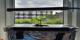

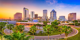

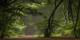

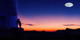

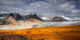

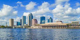

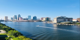

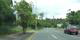

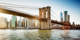

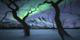

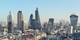

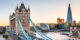

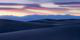

(15, 40, 80, 3)

In [90]:
#loop this for all images in a directory
import os

f = r'C:/Users/vicch/jupyterlab_workspace/photos to test inference/raw'
for file in os.listdir(f):
    f_img = f+'/'+file
    f_img_out_path = r'C:/Users/vicch/jupyterlab_workspace/photos to test inference/preprocessed/'+file
    img = Image.open(f_img)
    #img = img.resize((200,120))
    #display(img)
    img = img.resize((80,40))
    img.save(f_img_out_path)
    display(img)

f1 = r'C:/Users/vicch/jupyterlab_workspace/photos to test inference/preprocessed/'
array_list = []
for file in os.listdir(f1):
    img = Image.open(f1+file)
    imgnpy = asarray(img)
    array_list.append(imgnpy)
pred_array = np.stack(array_list)
pred_array.shape

In [91]:
model_pred = model.predict(pred_array)
np.around(model_pred)

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

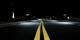

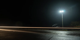

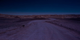

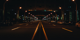

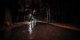

(5, 40, 80, 3)


array([[0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [102]:
#loop this for all images in a directory
import os

f = r'C:/Users/vicch/jupyterlab_workspace/photos to test inference/raw'
for file in os.listdir(f):
    f_img = f+'/'+file
    f_img_out_path = r'C:/Users/vicch/jupyterlab_workspace/photos to test inference/preprocessed/'+file
    img = Image.open(f_img)
    #img = img.resize((200,120))
    #display(img)
    img = img.resize((80,40))
    img.save(f_img_out_path)
    display(img)

f1 = r'C:/Users/vicch/jupyterlab_workspace/photos to test inference/preprocessed/'
array_list = []
for file in os.listdir(f1):
    img = Image.open(f1+file)
    imgnpy = asarray(img)
    array_list.append(imgnpy)
pred_array = np.stack(array_list)
print(pred_array.shape)

#predict
model_pred = model.predict(pred_array)
np.around(model_pred)